In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
X = dataset.iloc[:,:-1].values # independent variable
y = dataset.iloc[:,-1].values # dependent variable

In [5]:
plt.style.use('fivethirtyeight')

In [6]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

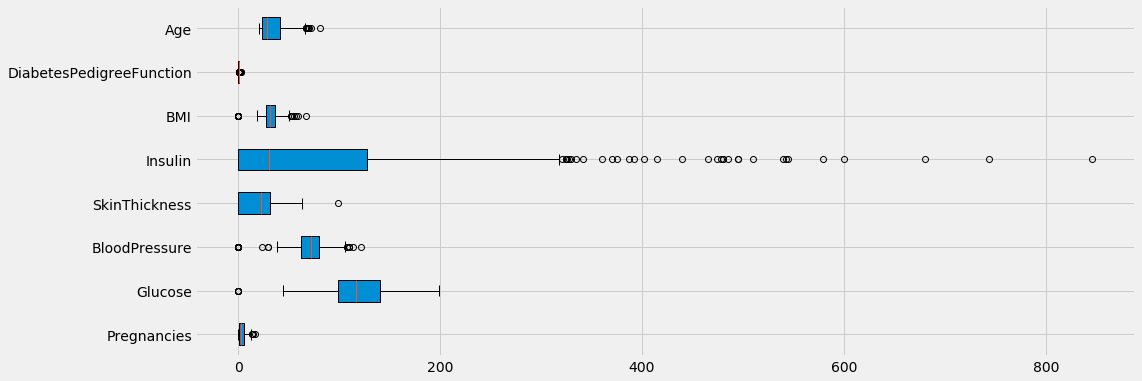

In [12]:
fig = plt.figure(figsize=(15,6))
plt.boxplot(X, vert = False,labels= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                      'BMI', 'DiabetesPedigreeFunction', 'Age'], patch_artist=True)
plt.show()

In [14]:
corr = dataset.corr()

In [15]:
import seaborn as sns

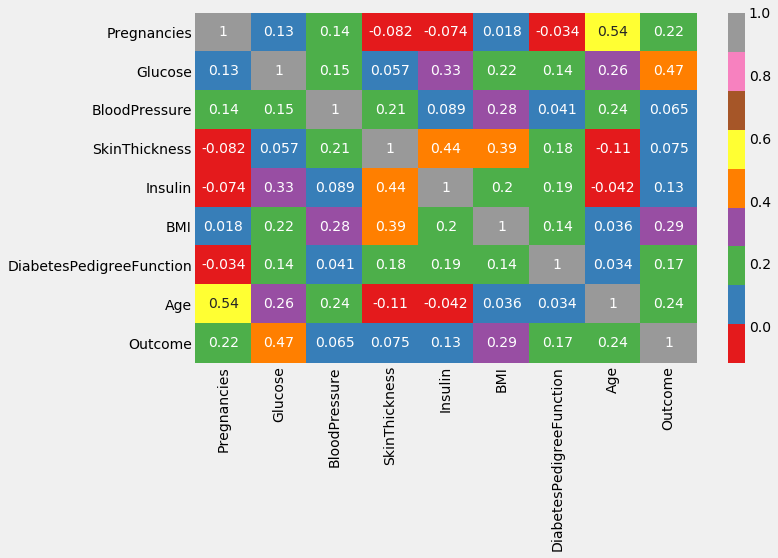

In [16]:
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot = True,cmap = 'Set1')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X_new = sc.fit_transform(X)
X_new

array([[ 0.35294118,  0.74371859,  0.59016393, ...,  0.50074516,
         0.23441503,  0.48333333],
       [ 0.05882353,  0.42713568,  0.54098361, ...,  0.39642325,
         0.11656704,  0.16666667],
       [ 0.47058824,  0.91959799,  0.52459016, ...,  0.34724292,
         0.25362938,  0.18333333],
       ..., 
       [ 0.29411765,  0.6080402 ,  0.59016393, ...,  0.390462  ,
         0.07130658,  0.15      ],
       [ 0.05882353,  0.63316583,  0.49180328, ...,  0.4485842 ,
         0.11571307,  0.43333333],
       [ 0.05882353,  0.46733668,  0.57377049, ...,  0.45305514,
         0.10119556,  0.03333333]])

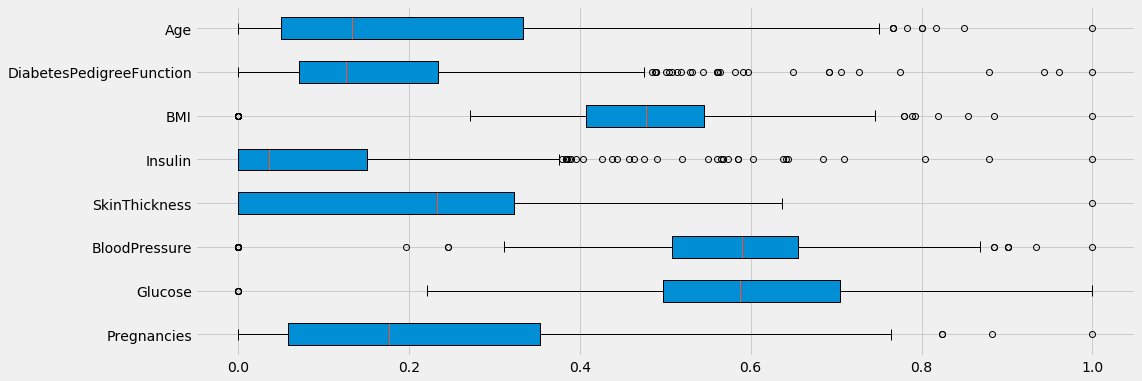

In [18]:
fig = plt.figure(figsize=(15,6))
plt.boxplot(X_new, vert = False,labels= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                      'BMI', 'DiabetesPedigreeFunction', 'Age'], patch_artist=True)
plt.show()

In [19]:
mx = sc.data_max_
mn = sc.data_min_

In [20]:
np.savez('scale.npz',mn,mx)

In [21]:
print(mx)
print(mn)

[  17.    199.    122.     99.    846.     67.1     2.42   81.  ]
[  0.      0.      0.      0.      0.      0.      0.078  21.   ]


In [22]:
from sklearn.cross_validation import train_test_split

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2,
                                                   random_state =0 )

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [25]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
model_log = LogisticRegression(C = 10.0)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_svm = SVC(C = 10.0,probability=True) 
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_nb = MultinomialNB(alpha = 1)

In [27]:
model_log.fit(x_train, y_train) # training model
model_knn.fit(x_train, y_train) # training model
model_svm.fit(x_train, y_train) # training model
model_dt.fit(x_train, y_train) # training model
model_rf.fit(x_train, y_train) # training model
model_nb.fit(x_train, y_train) # traning model

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [28]:
y_pred_log = model_log.predict(x_test) # we use this for evaluation
y_pred_knn = model_knn.predict(x_test) # we use this for evaluation
y_pred_svm = model_svm.predict(x_test) # we use this for evaluation
y_pred_dt = model_dt.predict(x_test) # we use this for evaluation
y_pred_rf = model_rf.predict(x_test) # we use this for evaluation
y_pred_nb = model_rf.predict(x_test) # we use this for evaluation

In [29]:
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score

In [30]:
cm_log = confusion_matrix(y_test, y_pred_log) # confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn) # confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm) # confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt) # confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf) # confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb) # confusion matrix


cr_log = classification_report(y_test, y_pred_log) # classification report
cr_knn = classification_report(y_test, y_pred_knn) # classification report
cr_svm = classification_report(y_test, y_pred_svm) # classification report
cr_dt = classification_report(y_test, y_pred_dt) # classification report
cr_rf = classification_report(y_test, y_pred_rf) # classification report
cr_nb = classification_report(y_test, y_pred_nb) # classification report

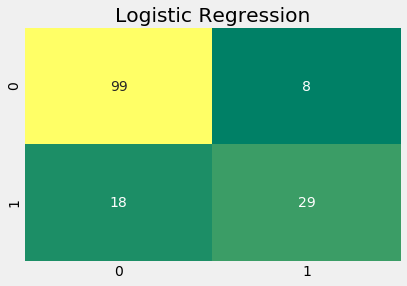

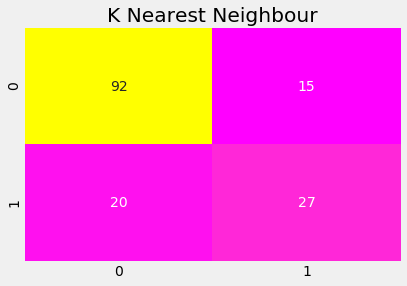

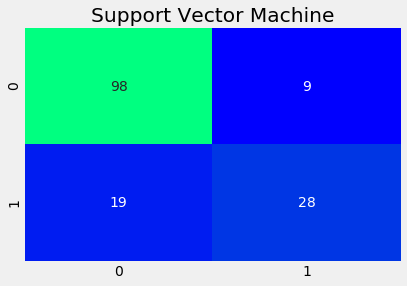

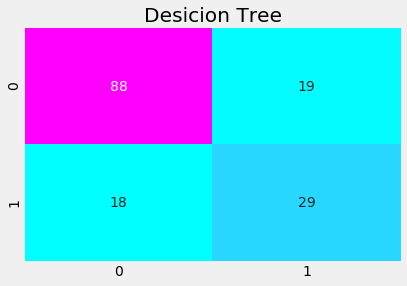

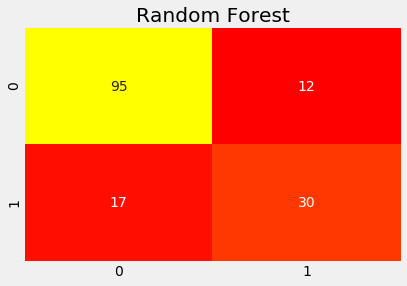

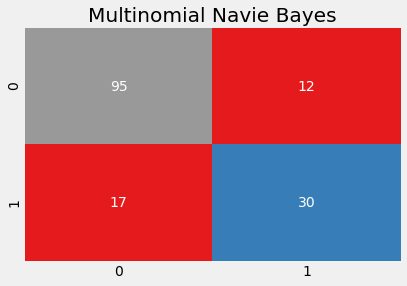

In [31]:
sns.heatmap(cm_log,annot=True,cbar=None,cmap = 'summer')
plt.title('Logistic Regression')
plt.show()
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'spring')
plt.title('K Nearest Neighbour')
plt.show()
sns.heatmap(cm_svm,annot=True,cbar=None,cmap = 'winter')
plt.title('Support Vector Machine')
plt.show()
sns.heatmap(cm_dt,annot=True,cbar=None,cmap = 'cool')
plt.title('Desicion Tree')
plt.show()
sns.heatmap(cm_rf,annot=True,cbar=None,cmap = 'autumn')
plt.title('Random Forest')
plt.show()
sns.heatmap(cm_nb,annot=True,cbar=None,cmap = 'Set1')
plt.title('Multinomial Navie Bayes')
plt.show()

In [32]:
print('='*20+'Logistic Regression'+'='*20)
print(cr_log)
print("Accuracy_Score: ", accuracy_score(y_test, y_pred_log) , "\n")
print('='*20+'KNearest Neighbour'+'='*20)
print(cr_knn)
print("Accuracy_Score: ", accuracy_score(y_test, y_pred_knn) , "\n")
print('='*20+'Support Vector Machine'+'='*20)
print(cr_svm)
print("Accuracy_Score: ", accuracy_score(y_test, y_pred_svm) , "\n")
print('='*20+'Descion Tree'+'='*20)
print(cr_dt)
print("Accuracy_Score: ", accuracy_score(y_test, y_pred_dt) , "\n")
print('='*20+'Random Forest'+'='*20)
print(cr_rf)
print("Accuracy_Score: ", accuracy_score(y_test, y_pred_rf) , "\n")
print('='*20+'Multinomial NB'+'='*20)
print(cr_nb)
print("Accuracy_Score: ", accuracy_score(y_test, y_pred_nb) , "\n")

====================Logistic Regression====================
             precision    recall  f1-score   support

          0       0.85      0.93      0.88       107
          1       0.78      0.62      0.69        47

avg / total       0.83      0.83      0.82       154

Accuracy_Score:  0.831168831169 

====================KNearest Neighbour====================
             precision    recall  f1-score   support

          0       0.82      0.86      0.84       107
          1       0.64      0.57      0.61        47

avg / total       0.77      0.77      0.77       154

Accuracy_Score:  0.772727272727 

====================Support Vector Machine====================
             precision    recall  f1-score   support

          0       0.84      0.92      0.88       107
          1       0.76      0.60      0.67        47

avg / total       0.81      0.82      0.81       154

Accuracy_Score:  0.818181818182 

====================Descion Tree====================
             preci

# Watson Machine Learning Deployment

###### First, you must import client libraries.

In [3]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

ModuleNotFoundError: No module named 'watson_machine_learning_client'

#### Create the API client

In [4]:
wml_credentials ={ 
    "username": "bbb1ed25-9aaf-4d62-bc0a-8dea026f6920",
  "password": "0387a262-8ab4-4761-ba55-a3150cdf1daa",
  "instance_id": "81ad6bdf-bb11-429e-90e0-0deb3689eddb",
  "url": "https://ibm-watson-ml.eu-gb.bluemix.net"
}

#### Get instance details.

In [ ]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [ ]:
import json

instance_details = client.service_instance.get_details()

#### 4.2 Save the model to the WML repository

In [ ]:
published_model = client.repository.store_model(model=model_nb, meta_props={'name':'Diabetes'}, \
                                                training_data=x_train, training_target=y_train)

##### Get information about a specific model in the WML repository.

In [ ]:
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

print(json.dumps(model_details, indent=2))

##### Get information about all of the models in the WML repository.

In [ ]:
models_details = client.repository.list_models()

#### 4.3 Load a model from the WML repository

In [ ]:
loaded_model = client.repository.load(published_model_uid)

In [ ]:
test_predictions = loaded_model.predict(x_test[:5])

In [ ]:
print(test_predictions)